In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scan = np.loadtxt('laserscan.dat')
scan.shape

(361,)

In [3]:
robot_coords = np.array([[1, 0.5, np.pi/4]]).reshape(-1, 1)
robot_coords

array([[1.        ],
       [0.5       ],
       [0.78539816]])

In [4]:
sensor_coords = np.array([[0.2, 0, np.pi]]).reshape(-1, 1)
sensor_coords

array([[0.2       ],
       [0.        ],
       [3.14159265]])

In [5]:
a0 = -np.pi/2
a1 = +np.pi/2

angle = np.linspace(a0, a1, len(scan), endpoint=True)
angle.shape

(361,)

In [6]:
map = np.vstack([scan * np.cos(angle), scan * np.sin(angle), np.ones_like(scan)])
map.shape

(3, 361)

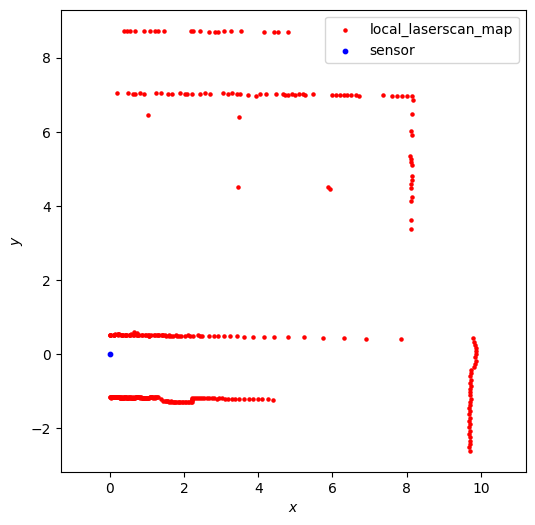

In [7]:
plt.figure(figsize=(6, 6))
plt.scatter(map[0, :], map[1, :], color='r', s=5, label='local_laserscan_map')
plt.scatter(0, 0, color='b', s=10, label='sensor')
plt.legend()
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [8]:
map.shape

(3, 361)

In [9]:
def create_T(coords):
    x, y, theta = coords.reshape(-1)

    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1],
    ])

T_world_robot = create_T(robot_coords)
T_robot_sensor = create_T(sensor_coords)

global_map = T_world_robot @ T_robot_sensor @ map
global_map.shape

(3, 361)

In [10]:
robot_coords

array([[1.        ],
       [0.5       ],
       [0.78539816]])

In [11]:
global_sensor_coords = T_world_robot @ np.array([*sensor_coords[:2, 0], 1]).reshape(-1, 1)
global_sensor_coords

array([[1.14142136],
       [0.64142136],
       [1.        ]])

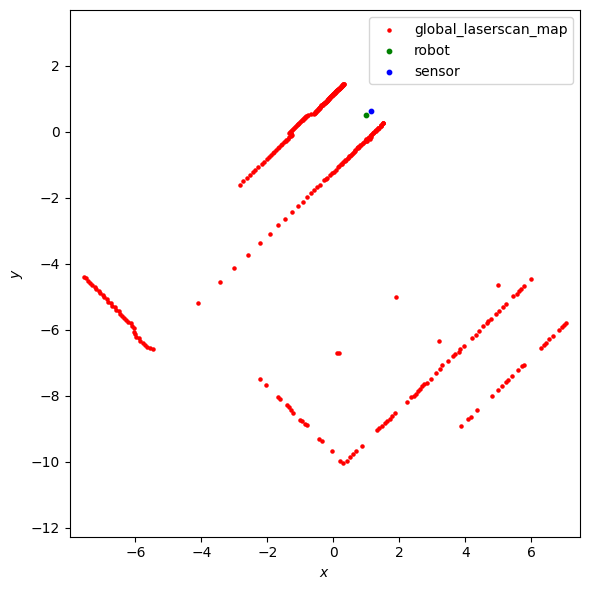

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(global_map[0, :], global_map[1, :], color='r', s=5, label='global_laserscan_map')
plt.scatter(robot_coords[0, 0], robot_coords[1, 0], color='g', s=10, label='robot')
plt.scatter(global_sensor_coords[0, 0], global_sensor_coords[1, 0], color='b', s=10, label='sensor')
plt.legend()
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.show()